In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

### HW1 3a and 3b

In [7]:
DIR = '/nfs/spare11/env315/data/'
filename = 'era5_u1060_daily_1980-2019.nc'
datafile = DIR+filename
data = xr.open_mfdataset(datafile,combine='by_coords').compute()
data = data.u_component_of_wind

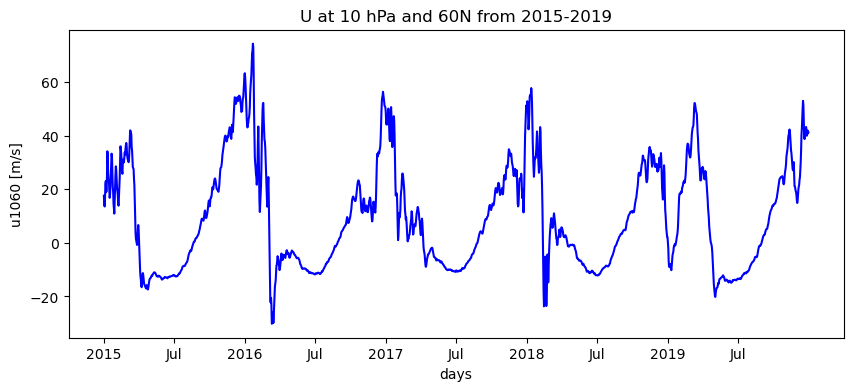

In [15]:
data = data.sel(time=slice('2015-01-01','2019-12-31'))
figure = plt.figure(figsize=(10,4))
data.plot(color='blue') # to define line color
# Get the indices of January 1st and July 1st
jan1_idx = pd.to_datetime([f'{year}-01-01' for year in range(2015, 2019 + 1)])
jul1_idx = pd.to_datetime([f'{year}-07-01' for year in range(2015, 2019 + 1)])

# Combine indices and sort
all_indices = np.sort(np.concatenate((jan1_idx, jul1_idx)))

# Set the x-axis ticks to January 1st and July 1st
plt.xticks(all_indices)

plt.xlabel('days')
plt.ylabel('u1060 [m/s]')
plt.title('U at 10 hPa and 60N from 2015-2019')
plt.savefig('u1060_2015-2019.png') 

### HW1 3c

In [46]:
DIR = '/nfs/spare11/env315/data/'
filename = 'era5_an_temp_reg2_daily_2021.nc'
datafile = DIR+filename
data = xr.open_mfdataset(datafile,combine='by_coords').compute()
data = data.var130

In [47]:
data = data.sel(lon=slice(235,295),lat=slice(50,25),plev=100000,time='2021-01-19')
data

<xarray.DataArray 'var130' (time: 1, lat: 13, lon: 30)> Size: 2kB
array([[[279.42197, 278.97372, 276.8287 , 274.8917 , 275.77792,
         277.97617, 278.0914 , 276.41464, 274.70566, 272.11142,
         267.93222, 263.40292, 259.09042, 255.48788, 254.07968,
         254.46152, 254.8248 , 255.35507, 256.4371 , 256.7994 ,
         256.55527, 257.13144, 257.80185, 256.96347, 255.2496 ,
         254.39316, 255.01474, 256.6246 , 258.8116 , 261.9122 ],
        [278.18808, 279.30576, 278.85556, 276.69052, 276.04355,
         277.50546, 278.2369 , 277.67197, 277.0538 , 275.5577 ,
         272.63095, 269.18417, 264.78036, 259.8165 , 257.24814,
         257.6544 , 258.8956 , 260.66318, 262.7247 , 263.16806,
         262.3243 , 262.10214, 261.94394, 260.74765, 259.2584 ,
         258.3707 , 258.50546, 259.74033, 261.43906, 263.56015],
        [279.733  , 279.58163, 278.6783 , 277.50497, 276.96347,
         277.09726, 277.25546, 277.70175, 278.2867 , 277.36923,
         275.22372, 273.5411 , 271.01425, 266.47128, 262.8243 ,
         262.00107, 262.61777, 264.31992, 267.0245 , 268.68173,
         268.62656, 267.9913 , 266.77988, 265.00937, 263.49277,
         262.4044 , 262.18564, 263.32138, 264.80966, 266.14365],
        [281.47812, 280.04208, 278.73495, 278.77353, 278.68564,
         278.03818, 277.79648, 278.05576, 278.1959 , 277.67587,
...
         287.26083, 287.95615, 288.61923, 289.15585, 289.89853],
        [288.39413, 287.80673, 286.15   , 286.70468, 289.4537 ,
         290.8536 , 293.28622, 296.36044, 297.05283, 295.55673,
         293.16025, 290.91074, 290.8663 , 291.94394, 290.63876,
         289.1334 , 288.62167, 287.67783, 287.00497, 286.23398,
         285.40634, 285.65683, 286.9337 , 287.85312, 288.44882,
         289.23984, 289.66367, 290.26132, 290.94687, 291.59335],
        [289.04306, 288.5792 , 287.73593, 287.92978, 289.07285,
         290.18124, 292.27744, 294.71786, 297.4996 , 299.51816,
         299.42538, 297.02353, 294.21884, 293.70517, 292.9962 ,
         291.5533 , 291.01816, 290.38437, 289.63095, 288.15878,
         286.46542, 287.0875 , 289.02792, 289.62753, 290.03574,
         291.05966, 291.39658, 291.86386, 292.55234, 293.11288],
        [290.00058, 289.35556, 289.03085, 289.57236, 289.84238,
         290.62753, 292.11874, 292.94247, 295.63046, 299.57626,
         301.85458, 301.14072, 296.9122 , 294.31064, 294.07333,
         292.71054, 292.36435, 292.66025, 292.20908, 290.83163,
         288.92392, 289.46835, 290.95956, 291.35165, 292.13632,
         292.98642, 293.35605, 293.921  , 294.4659 , 294.75742]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 104B 50.0 48.0 46.0 44.0 42.0 ... 32.0 30.0 28.0 26.0
  * lon      (lon) float64 240B 236.0 238.0 240.0 242.0 ... 290.0 292.0 294.0
    plev     float64 8B 1e+05
  * time     (time) datetime64[ns] 8B 2021-01-19T09:00:00
Attributes:
    table:         128
    cell_methods:  time: mean

<class 'numpy.ndarray'> (13, 30)


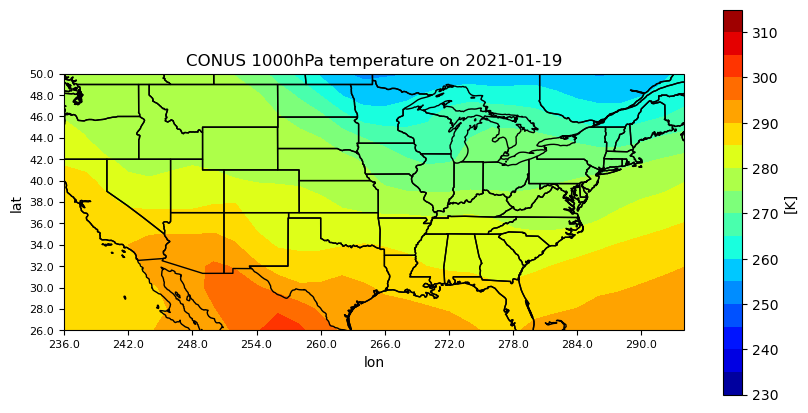

In [53]:
temp_conus = np.squeeze(data.values)
print(type(temp_conus),np.shape(temp_conus))

figure = plt.figure(figsize=(10,5))
lon_min, lon_max = data.lon[0], data.lon[-1]
lat_min, lat_max = data.lat[0], data.lat[-1]
ax = figure.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree()) 
# third, use self-defined color bar
hm = ax.contourf(data.lon.values,data.lat.values,temp_conus,cmap='jet',levels=np.arange(230,320,5),transform=ccrs.PlateCarree())
# except for the "ax.contourf" command line, other commands are the same as using xarray
plt.title('CONUS 1000hPa temperature on 2021-01-19')

long = data.lon.values[0:30:3]
latg = data.lat.values
ax.set_xticks(long, crs=ccrs.PlateCarree())
ax.set_yticks(latg, crs=ccrs.PlateCarree())
ax.set_xticklabels(long, fontsize=8)
ax.set_yticklabels(latg, fontsize=8)
ax.set_ylabel('lat', fontsize=10)
ax.set_xlabel('lon', fontsize=10)

ax.add_feature(cf.LAND)
ax.add_feature(cf.STATES)
ax.coastlines()

# define your own colorbar feature
cbar = plt.colorbar(hm, orientation='vertical',pad=0.05)
cbar.ax.tick_params(labelsize=10) 
colorLabel='[K]'
cbar.set_label(label=colorLabel,fontsize=10)